In [1]:
import numpy as np
import scipy as sc
import os, re
import matplotlib.pyplot as plt
from prettyprint import pp
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from datetime import datetime as dt
from ipy_table import *
from string import punctuation, digits

In [2]:
def train_test_split(ratio, classes, files):
    """
    this method will split the input list of files to train and test sets.
    *Note: currently this method uses the simplest way an array can be split in two parts.
    Parameters
    ----------
    ratio: float
           ratio of total documents in each class assigned to the training set
    classes: list
             list of label classes
    files: dictionary
           a dictionary with list of files for each class
    
    Returns
    -------
    train_dic: dictionary
                a dictionary with lists of documents in the training set for each class
    test_dict: dictionary
                a dictionary with lists of documents in the testing set for each class
    """
    train_dict = {}
    test_dict = {}
    for cl in classes:
        train_cnt = int(ratio * len(files[cl]))
        train_dict[cl] = files[cl][:train_cnt]
        test_dict[cl] = files[cl][train_cnt:]
    return train_dict, test_dict

In [3]:
def cleanupText(path):
    """
    this method will read in a text file and try to cleanup its text.
    Parameters
    ----------
    path: path to the document file
    
    Returns
    -------
    text_cleaned: cleaned up raw text in the input file
    """
    
    text_cleaned = ''
    try:
        f = open(path)
        raw = f.read().lower()
        text =  raw
        text_cleaned = text.translate(None, punctuation + digits)
        # print "\n Word count before:" + str(len(text_translated.split())) + "\n"
        # for stop in stop_word:
        #   text_translated = text_translated.replace(stop,'')
        # print "\n Word count after:" + str(len(text_translated.split())) + "\n"
        text_cleaned = ' '.join([word for word in text_cleaned.split(' ') if (word and len(word) > 1)])
        
    finally:
        f.close()
    return text_cleaned


In [4]:
def testClassifier(x_train, y_train, x_test, y_test, clf):
    """
    this method will first train the classifier on the training data
    and will then test the trained classifier on test data.
    Finally it will report some metrics on the classifier performance.
    
    Parameters
    ----------
    x_train: np.ndarray
             train data matrix
    y_train: list
             train data label
    x_test: np.ndarray
            test data matrix
    y_test: list
            test data label
    clf: sklearn classifier object implementing fit() and predict() methods
    
    Returns
    -------
    metrics: list
             [training time, testing time, recall and precision for every class, macro-averaged F1 score]
    """
    #metrics = []
    start = dt.now()
    clf.fit(x_train, y_train)
    end = dt.now()
    print 'training time: ', (end - start)
    
    # add training time to metrics
    #metrics.append(end-start)
    
    start = dt.now()
    yhat = clf.predict(x_test)
    end = dt.now()
    print 'testing time: ', (end - start)
    
    # add testing time to metrics
    #metrics.append(end-start)
    
    print 'classification report: '
#     print classification_report(y_test, yhat)
    pp(classification_report(y_test, yhat))
    
    print 'f1 score'
    print f1_score(y_test, yhat, average='macro')
    
    print 'accuracy score'
    accuracy = accuracy_score(y_test, yhat)
    print accuracy
    #metrics.append(accuracy)
    #precision = precision_score(y_test, yhat, average=None)
    #recall = recall_score(y_test, yhat, average=None)
    
    # add precision and recall values to metrics
    #for p, r in zip(precision, recall):
    #    metrics.append(p)
    #    metrics.append(r)
    
    
    #add macro-averaged F1 score to metrics
    #metrics.append(f1_score(y_test, yhat, average='macro'))
    
    print 'confusion matrix:'
    print confusion_matrix(y_test, yhat)
    
    # plot the confusion matrix
    plt.imshow(confusion_matrix(y_test, yhat), interpolation='nearest')
    plt.show()
    
    return accuracy

18991
28496
(18991, 95423)
(28496, 95423)
(18991, 95423)
(28496, 95423)
0.4
training time:  0:00:41.295821
testing time:  0:00:49.118741
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.83      0.83      0.83      2367
   giai-tri       0.92      0.97      0.95      2745
   giao-duc       0.91      0.84      0.87      2531
   khoa-hoc       0.89      0.89      0.89      2639
 kinh-doanh       0.86      0.85      0.85      2700
 oto-xe-may       0.97      0.95      0.96      2522
  phap-luat       0.87      0.92      0.89      2700
     so-hoa       0.94      0.88      0.91      2415
   the-gioi       0.87      0.92      0.89      2688
   the-thao       0.99      0.98      0.99      2745
    thoi-su       0.81      0.81      0.81      2444

avg / total       0.90      0.90      0.90     28496
"
f1 score
0.895624619491
accuracy score
0.897143458731
confusion matrix:
[[1953   26    9  109   78    1   12    3  102    2   72]
 [  19 2675   1

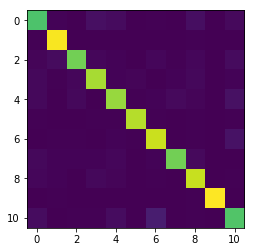

training time:  0:00:31.692258
testing time:  0:00:43.112877
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.82      0.83      2367
   giai-tri       0.93      0.97      0.95      2745
   giao-duc       0.92      0.85      0.89      2531
   khoa-hoc       0.90      0.88      0.89      2639
 kinh-doanh       0.81      0.90      0.85      2700
 oto-xe-may       0.99      0.91      0.95      2522
  phap-luat       0.87      0.92      0.90      2700
     so-hoa       0.94      0.89      0.91      2415
   the-gioi       0.87      0.92      0.90      2688
   the-thao       0.99      0.99      0.99      2745
    thoi-su       0.82      0.79      0.81      2444

avg / total       0.90      0.90      0.90     28496
"
f1 score
0.895818932532
accuracy score
0.897108366086
confusion matrix:
[[1939   47   12   96  100    1   13    6   84    1   68]
 [  15 2676    8    5    8    0    6    5   18    0    4]
 [  36   46 2156   45   48    2  

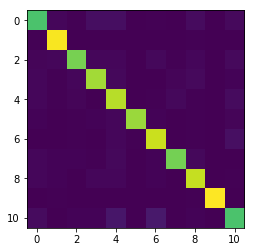

23741
23746
(23741, 107847)
(23746, 107847)
(23741, 107847)
(23746, 107847)
0.5
training time:  0:01:16.903642
testing time:  0:00:57.262510
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.83      0.84      0.84      1972
   giai-tri       0.92      0.97      0.94      2287
   giao-duc       0.90      0.85      0.87      2109
   khoa-hoc       0.88      0.89      0.89      2199
 kinh-doanh       0.85      0.86      0.85      2250
 oto-xe-may       0.97      0.95      0.96      2102
  phap-luat       0.88      0.90      0.89      2250
     so-hoa       0.94      0.86      0.90      2012
   the-gioi       0.87      0.91      0.89      2240
   the-thao       0.99      0.99      0.99      2288
    thoi-su       0.81      0.81      0.81      2037

avg / total       0.90      0.90      0.90     23746
"
f1 score
0.89444212936
accuracy score
0.895771919481
confusion matrix:
[[1664   23    8   87   54    1   12    3   67    0   53]
 [  15 2224 

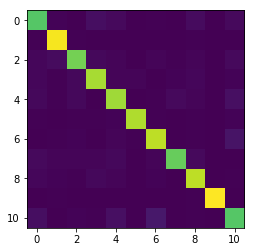

training time:  0:01:03.609388
testing time:  0:00:47.332940
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.83      0.84      1972
   giai-tri       0.93      0.97      0.95      2287
   giao-duc       0.90      0.86      0.88      2109
   khoa-hoc       0.88      0.89      0.88      2199
 kinh-doanh       0.80      0.90      0.85      2250
 oto-xe-may       0.99      0.91      0.95      2102
  phap-luat       0.88      0.91      0.89      2250
     so-hoa       0.94      0.86      0.90      2012
   the-gioi       0.88      0.90      0.89      2240
   the-thao       0.99      0.99      0.99      2288
    thoi-su       0.83      0.80      0.81      2037

avg / total       0.90      0.90      0.90     23746
"
f1 score
0.894135407232
accuracy score
0.895224458856
confusion matrix:
[[1645   39   13   94   70    1    9    3   53    0   45]
 [  12 2220   12    4   11    0    8    4   13    0    3]
 [  31   36 1811   45   40    2  

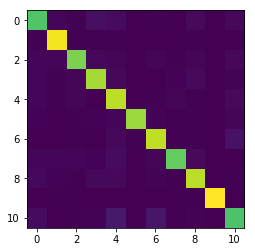

28488
18999
(28488, 120183)
(18999, 120183)
(28488, 120183)
(18999, 120183)
0.6
training time:  0:01:58.248392
testing time:  0:00:56.018411
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.85      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.90      0.86      0.88      1687
   khoa-hoc       0.89      0.90      0.89      1760
 kinh-doanh       0.84      0.86      0.85      1800
 oto-xe-may       0.97      0.93      0.95      1682
  phap-luat       0.88      0.92      0.90      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.89      0.94      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.80      0.81      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.897141389453
accuracy score
0.898573609137
confusion matrix:
[[1344   19    5   72   38    1    9    2   46    0   42]
 [   9 1782

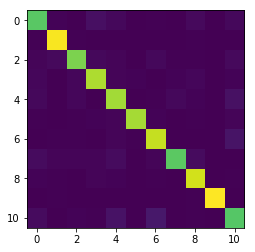

training time:  0:01:24.276730
testing time:  0:00:39.130485
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.84      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.91      0.86      0.89      1687
   khoa-hoc       0.89      0.90      0.90      1760
 kinh-doanh       0.78      0.90      0.84      1800
 oto-xe-may       0.99      0.88      0.93      1682
  phap-luat       0.87      0.92      0.89      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.80      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.894703474963
accuracy score
0.895889257329
confusion matrix:
[[1329   27   11   76   49    1    8    2   41    0   34]
 [   9 1780   10    4    9    0    5    2   10    0    1]
 [  17   27 1454   39   35    2  

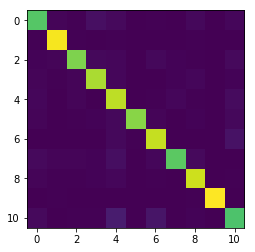

33236
14251
(33236, 133112)
(14251, 133112)
(33236, 133112)
(14251, 133112)
0.7


In [ ]:
data_path = '/Users/alexandre/Projects/TextClassificationBayes/tok_vnexpress/'
stopwords_path = '/Users/alexandre/Projects/TextClassificationBayes/vietnamese-stopwords-dash.txt'


#Classes are the folder names
class_names = os.listdir(data_path)
folders =  [data_path + folder + '/' for folder in os.listdir(data_path) if folder != ".DS_Store"]

if '.DS_Store' in class_names: del class_names[0]

#list the files of each class

metrics_dict = {}

ratio = [0.4,0.5,0.6,0.7,0.8,0.9]
files = {}
for folder, name in zip(folders, class_names):
    files[name] = [folder + f for f in os.listdir(folder)]


for train_test_ratio in ratio:

   
    train_path, test_path = train_test_split(train_test_ratio, class_names, files)
    #train_path, test_path, class_train, class_test = train_test_split(files, class_names, test_size=0.3, random_state=42)
    
    train_arr = []
    test_arr = []
    train_lbl = []
    test_lbl = []
    
    for cl in class_names:
        for path in train_path[cl]:
            train_arr.append(cleanupText(path))
            train_lbl.append(cl)
        for path in test_path[cl]:
            test_arr.append(cleanupText(path))
            test_lbl.append(cl)
            
    print len(train_arr)
    print len(test_arr)
    vectorizer = CountVectorizer()
    vectorizer.fit(train_arr)
    train_mat = vectorizer.transform(train_arr)
    print train_mat.shape
    #print train_mat
    test_mat = vectorizer.transform(test_arr)
    print test_mat.shape
    tfidf = TfidfTransformer()
    tfidf.fit(train_mat)
    train_tfmat = tfidf.transform(train_mat)
    print train_tfmat.shape
    #print train_tfmat
    test_tfmat = tfidf.transform(test_mat)
    print test_tfmat.shape
    alpha=0.1
    print train_test_ratio
    mnb = MultinomialNB(alpha=alpha)
    mnb_me = testClassifier(train_mat.toarray(), train_lbl, test_mat.toarray(), test_lbl, mnb)
    mnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, mnb)
    metrics_dict.update({alpha:mnb_me})

In [ ]:
#print graph for result
lists = sorted(metrics_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print x
print y
plt.plot(x, y)
plt.gca().invert_xaxis()
plt.xlim(5, 0)  # decreasing time
plt.xlabel('decreasing alpha')
plt.ylabel('accuracy')
plt.title('Accuracy changes according to alpha')
plt.grid(True)

plt.show()